<h1 align="center"> ФМИ. Disbalanced dataset.  Part 2 </h1>
<h1 align="center"> Credit card Fraud Detector </h1>


<h2> Введение </h2>

На данном семинаре мы будем реализовывать различные прогностические модели, чтобы проверить, насколько точно они определяют, является ли транзакция обычным платежом (non Fraud) или мошенничеством (Fraud).

<h4> По мотивам кейса, рассмотренного в Зимней школе СберУнивера </h4>

<h2> Наши цели: </h2>
<ul>
<li> Проанализировать полученные данные.</li>
<li> Решить проблему сильного дисбаланса классов.  </li>
<li>Построить модели на основе классических алгоритмов машинного обучения. </li>
<li> Провести сравнительный анализ классических подходов.</li>

## Описание данных и постановка задачи:
**Задача:** см ФМИ. Disbalanced dataset.Part 1


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

Подключимся к диску для загрузки данных.

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загружаем данные.

In [67]:
# Будем загружать данные, полученные в предыдущем блокноте.
# См обновленный блокнот

new_df = pd.read_csv('/content/drive/MyDrive/data/creditcard_short.csv')
new_df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,207932,136896.0,-1.127773,-0.000764,2.086885,-1.152551,0.167515,0.978595,-0.139196,0.478696,...,0.197055,0.517314,-0.333712,-1.330808,0.512191,0.827320,0.232434,0.115947,84.10,0
1,221018,142394.0,-3.367770,0.099249,-6.148487,3.401955,0.458307,-1.571630,-1.358708,0.672409,...,0.861308,1.249301,1.850627,-0.117471,1.219815,0.000251,1.036011,0.004367,320.01,1
2,143644,85509.0,-1.013687,0.020677,2.487143,-1.194780,-1.057366,0.135391,0.096850,-0.531380,...,-0.332052,-0.155334,-0.058255,0.595683,-0.797222,0.720158,-1.060281,-0.169811,48.99,0
3,189701,128519.0,-4.599447,2.762540,-4.656530,5.201403,-2.470388,-0.357618,-3.767189,0.061466,...,1.581480,0.261333,0.621415,0.994110,-0.687853,-0.337531,-1.612791,1.231425,93.35,1
4,176500,122798.0,-1.891137,0.253261,0.840307,1.056132,-0.446114,1.451748,0.934145,0.665405,...,-0.466944,-1.351634,0.031329,0.231774,0.462914,-0.819997,0.192571,-0.011175,283.00,0


In [68]:
new_df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,...,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000
mean,136574.312207,91149.395540,-0.754655,0.935679,-1.696120,1.526053,-0.445569,-0.504136,-1.043701,0.128568,...,0.236048,0.010784,-0.033604,-0.086599,0.020985,0.032593,0.103223,0.061058,98.707324,0.437793
std,84513.881834,48783.642507,2.450410,1.864851,3.038100,2.446490,1.835107,1.311137,2.377356,1.798126,...,1.119722,0.742124,0.876445,0.559168,0.600879,0.496338,0.601050,0.318392,201.738762,0.496407
min,541.000000,406.000000,-16.598665,-4.343137,-19.818982,-3.317195,-13.025901,-4.445610,-21.922811,-16.258941,...,-6.389132,-4.879417,-19.254328,-2.028024,-4.781606,-1.317541,-3.908080,-1.796363,0.000000,0.000000
25%,59707.000000,48962.750000,-1.803043,-0.276873,-3.437969,-0.237108,-1.164999,-1.236878,-1.802057,-0.204697,...,-0.184156,-0.522166,-0.197942,-0.403800,-0.315559,-0.305212,-0.051847,-0.043512,1.955000,0.000000
50%,140163.500000,83566.000000,-0.475322,0.705505,-0.919963,0.932152,-0.253952,-0.564057,-0.389444,0.114278,...,0.121043,0.007822,-0.036917,-0.029650,0.049648,-0.009672,0.042134,0.028346,19.115000,0.000000
75%,213224.500000,139162.750000,1.153068,1.922073,0.536559,3.159665,0.545034,0.105784,0.352890,0.606474,...,0.490471,0.524068,0.190727,0.328937,0.409680,0.324387,0.351136,0.171912,99.990000,1.000000
max,284409.000000,172416.000000,2.342626,10.541751,3.351161,9.648311,5.269255,5.701071,5.802537,11.161144,...,15.059285,2.941475,2.661291,1.204109,1.653012,2.745261,3.052358,1.779364,1809.680000,1.000000


In [69]:
df = pd.read_csv('/content/drive/MyDrive/data/creditcard_full.csv')
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,24365,33199.0,1.001080,-0.216417,1.467831,1.061327,-1.017560,0.369020,-0.879974,0.366602,...,0.363038,1.030014,-0.053893,0.242782,0.222673,-0.258036,0.082764,0.037358,39.99,0
1,128054,78581.0,-0.291440,1.180128,0.456858,0.889341,-0.037473,-0.472363,0.513685,0.240721,...,0.166862,0.381751,-0.052696,-0.125828,-0.022951,-0.298210,-0.051119,-0.019592,42.81,0
2,152406,97364.0,2.037085,-0.416448,-0.237763,-0.322418,-0.768980,-0.795787,-0.653908,-0.191182,...,-0.373183,-0.665898,0.433998,-0.120342,-0.698373,0.491229,-0.074325,-0.055934,5.95,0
3,148071,89363.0,-1.160802,0.206413,0.801010,0.869268,1.730579,-0.602634,0.604750,0.102266,...,0.230512,0.286415,-0.319317,0.730199,0.978895,-0.266060,-0.009249,0.069086,30.00,0
4,139507,83185.0,-2.093279,2.497557,1.090513,2.866020,-1.282600,0.069383,-0.839763,1.416449,...,0.350142,0.937713,0.046533,0.646039,-0.148919,0.321619,0.126818,0.132093,10.59,0


In [70]:
df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,142403.000000,94813.859575,1.177257e-15,3.382480e-16,-1.399620e-15,2.094253e-15,1.005713e-15,1.495696e-15,-5.631062e-16,1.148616e-16,...,1.611405e-16,-3.511212e-16,2.633035e-16,4.472717e-15,5.148190e-16,1.685215e-15,-3.658906e-16,-1.226704e-16,88.349619,0.001727
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,71201.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,142403.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,213604.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,284806.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<h3 style="text-align: center;">Материалы для изучения scikit-learn:<b></b></h3>

*1) Официальный сайт с подробными описаниями моделей и методов : https://scikit-learn.org/stable/user_guide.html*

*2) Полезный репозиторий с блокнотами: https://github.com/gmonce/scikit-learn-book*

*3) Хороший курс с упражнениями: https://inria.github.io/scikit-learn-mooc/*

In [71]:
'''
Работаем с маленьким датасетом new_df
Делаем из него 2 набора.
В первом - все столбцы, но нет целевой переменной.
Во втором - столбец с целевой переменной.
'''


X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [72]:
# Про масштабирование мы с вами уже в курсе. Опять используем RobustScaler

from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify = y)

X_train['scaled_amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['scaled_amount'] = rob_scaler.fit_transform(X_test['Amount'].values.reshape(-1,1))

X_train['scaled_time'] = rob_scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['scaled_time'] = rob_scaler.fit_transform(X_test['Time'].values.reshape(-1,1))


# удаляем из трейн и тест датасетов  столбцы Time и Amount,
# так как у нас уже есть их отмасштабированные версии
X_train.drop(['Time','Amount'], axis=1, inplace=True)
X_test.drop(['Time','Amount'], axis=1, inplace=True)

In [73]:
# Переводим данные в массив для подачи в классификатор
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [74]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# Выберем несколько простых моделей из библиотеки sklearn

classifiers = {
    "Ridge Classifier": RidgeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

Для борьбы с переобучением будем использовать кросс-валидацию.

<img src="https://scikit-learn.ru/wp-content/uploads/2021/10/image-161.png" width=800>

Разобьем обучающую выборку на 5 фолдов и обучим наши модели.

In [75]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    #classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Модель ", classifier.__class__.__name__, "получила на обучающей выборке", round(training_score.mean(), 2) * 100, "% accuracy score")

Модель  RidgeClassifier получила на обучающей выборке 92.0 % accuracy score
Модель  RandomForestClassifier получила на обучающей выборке 94.0 % accuracy score
Модель  GradientBoostingClassifier получила на обучающей выборке 94.0 % accuracy score
Модель  AdaBoostClassifier получила на обучающей выборке 93.0 % accuracy score
Модель  GaussianNB получила на обучающей выборке 88.0 % accuracy score


Для улучшения качества моделей переберем по сетке различные гиперпараметры методом GridSearchCV.


In [76]:
# Используем поиск по сетке для подбора гиперпараметров
from sklearn.model_selection import GridSearchCV

# Ridge Classifier
ridge_params = {
    'alpha': [0.1, 1.0, 10.0]
}
grid_ridge = GridSearchCV(RidgeClassifier(), ridge_params, cv=5)
grid_ridge.fit(X_train, y_train)
ridge_clf = grid_ridge.best_estimator_

# Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None] + list(range(1, 10)),
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
grid_rf.fit(X_train, y_train)
rf_clf = grid_rf.best_estimator_

# Gradient Boosting
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5)
grid_gb.fit(X_train, y_train)
gb_clf = grid_gb.best_estimator_

# AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1]
}
grid_ada = GridSearchCV(AdaBoostClassifier(), ada_params, cv=5)
grid_ada.fit(X_train, y_train)
ada_clf = grid_ada.best_estimator_


# Gaussian Naive Bayes
gnb_params = {
    'var_smoothing': np.logspace(0, -9, num=100)
}
grid_gnb = GridSearchCV(GaussianNB(), gnb_params, cv=5)
grid_gnb.fit(X_train, y_train)
gnb_clf = grid_gnb.best_estimator_

In [77]:
# Проверим, как поменялись метрики

ridge_score = cross_val_score(ridge_clf, X_train, y_train, cv=5)
print('Ridge Classifier Cross Validation Score: ', round(ridge_score.mean() * 100, 2).astype(str) + '%')

rf_score = cross_val_score(rf_clf, X_train, y_train, cv=5)
print('Random Forest Cross Validation Score', round(rf_score.mean() * 100, 2).astype(str) + '%')

gb_score = cross_val_score(gb_clf, X_train, y_train, cv=5)
print('Gradient Boosting Classifier Cross Validation Score', round(gb_score.mean() * 100, 2).astype(str) + '%')

ada_score = cross_val_score(ada_clf, X_train, y_train, cv=5)
print('AdaBoost Classifier Cross Validation Score', round(ada_score.mean() * 100, 2).astype(str) + '%')

gnb_score = cross_val_score(gnb_clf, X_train, y_train, cv=5)
print('Gaussian Process Cross Validation Score', round(gnb_score.mean() * 100, 2).astype(str) + '%')

Ridge Classifier Cross Validation Score:  91.92%
Random Forest Cross Validation Score 93.54%
Gradient Boosting Classifier Cross Validation Score 94.13%
AdaBoost Classifier Cross Validation Score 93.69%
Gaussian Process Cross Validation Score 88.25%


Видим явное улучшение!

Давайте теперь попробуем более умные способы undersampling. Например, с помощью NearMiss, который оценивает среднее расстояние между классами. Поможет нам в этом специальная библиотека для работы с несбалансированными даннными imblearn.

In [78]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

from sklearn.metrics import (precision_score, roc_auc_score, recall_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, precision_recall_curve, accuracy_score)

undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

undersample_Xtrain, undersample_Xtest, undersample_ytrain, undersample_ytest = train_test_split(undersample_X, undersample_y,
                                                                                                test_size = 0.2,
                                                                                                random_state=42,
                                                                                                stratify = undersample_y)#

undersample_Xtrain['scaled_amount'] = rob_scaler.fit_transform(undersample_Xtrain['Amount'].values.reshape(-1,1))#
undersample_Xtest['scaled_amount'] = rob_scaler.fit_transform(undersample_Xtest['Amount'].values.reshape(-1,1))#

undersample_Xtrain['scaled_time'] = rob_scaler.fit_transform(undersample_Xtrain['Time'].values.reshape(-1,1))#
undersample_Xtest['scaled_time'] = rob_scaler.fit_transform(undersample_Xtest['Time'].values.reshape(-1,1))#

undersample_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
undersample_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Метод NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss распределение классов: {}'.format(Counter(y_nearmiss)))
# Использовать сэмплирование будем во время кросс-валидации

for train, test in skf.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), ridge_clf)#
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])#
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])#

    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test],
                                                           undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

NearMiss распределение классов: Counter({0: 492, 1: 492})


Построим кривую обучение каждой из модели. Данная кривая показывает различие между метриками во время обычного обучения и во время кросс-валидации.

In [79]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import seaborn as sn

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, ax, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")

    ax.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Размер выборки')
    ax.set_ylabel('Score')
    ax.grid(True)
    ax.legend(loc="best")

def plot_learning_curves(estimator1, estimator2, estimator3, estimator4, estimator5, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, axs = plt.subplots(3, 2, figsize=(20, 21), sharey=True)  # Изменили на 3 строки и 2 столбца
    axs = axs.ravel()  # Преобразуем массив подграфиков в одномерный для удобства индексации
    if ylim is not None:
        plt.ylim(*ylim)

    plot_learning_curve(estimator1, axs[0], "Ridge Classifier Learning Curve", X, y, ylim=ylim, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    plot_learning_curve(estimator2, axs[1], "Random Forest Classifier Learning Curve", X, y, ylim=ylim, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    plot_learning_curve(estimator3, axs[2], "Gradient Boosting Classifier Learning Curve", X, y, ylim=ylim, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    plot_learning_curve(estimator4, axs[3], "AdaBoost Classifier Learning Curve", X, y, ylim=ylim, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    plot_learning_curve(estimator5, axs[5], "Gaussian Naive Bayes Classifier Learning Curve", X, y, ylim=ylim, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    plt.tight_layout()
    return plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

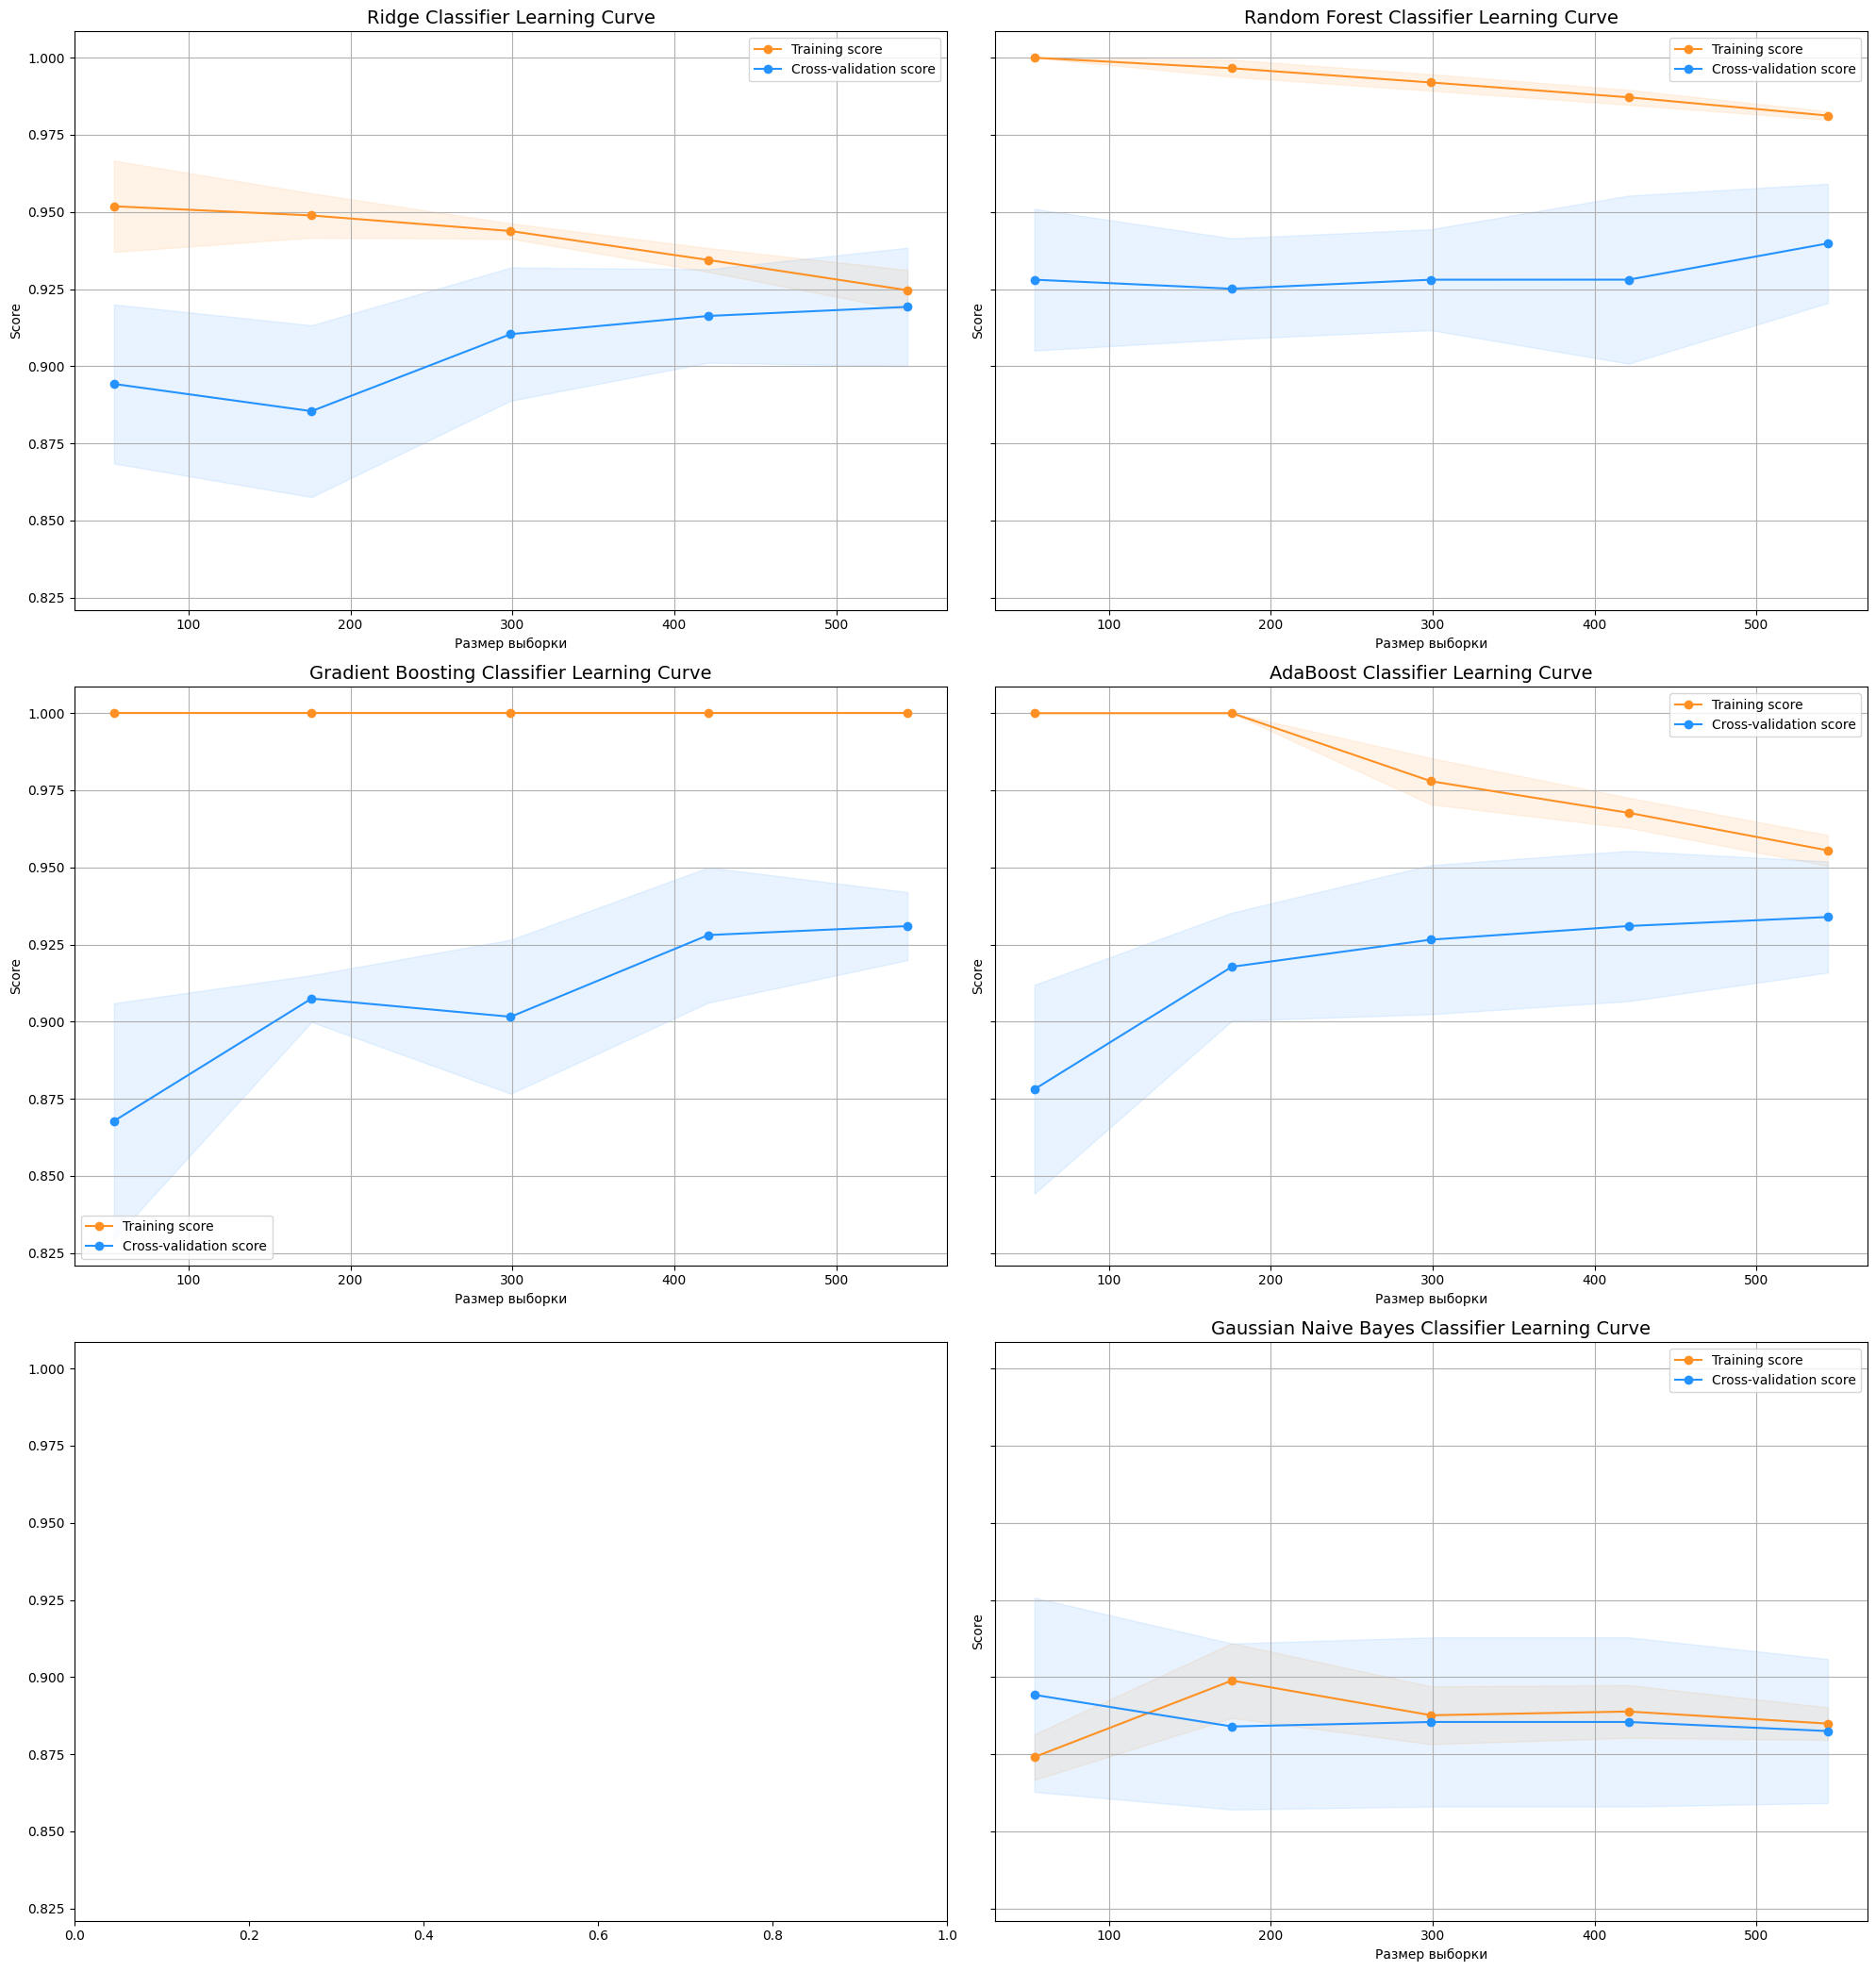

In [81]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curves(ridge_clf, rf_clf, gb_clf, ada_clf, gnb_clf, X_train, y_train)

## Кривые обучения:
<ul>
<li>Чем больше разрыв между результатами обучения и результатами кросс-валидации, тем больше вероятность того, что модель переобучилась (большой разброс).</li>
<li> Если результаты низкие как на обучающем, так и на кросс-валидационном наборе, это указывает на то, что наша модель недообучилась (большое смещение).</li>
<li>Логистическая регрессия показала себя лучше остальных.</li>
</ul>

In [82]:
from sklearn.model_selection import cross_val_predict

ridge_pred = cross_val_predict(ridge_clf, X_train, y_train, cv=5)
rf_pred = cross_val_predict(rf_clf, X_train, y_train, cv=5)
gb_pred = cross_val_predict(gb_clf, X_train, y_train, cv=5)
ada_pred = cross_val_predict(ada_clf, X_train, y_train, cv=5)
gnb_pred = cross_val_predict(gnb_clf, X_train, y_train, cv=5)

In [83]:
print('Ridge Classifier: ', roc_auc_score(y_train, ridge_pred))
print('Random Forest Classifier: ', roc_auc_score(y_train, rf_pred))
print('Gradient Boosting Classifier: ', roc_auc_score(y_train, gb_pred))
print('AdaBoost Classifier: ', roc_auc_score(y_train, ada_pred))
print('Gaussian Naive Bayes Classifier: ', roc_auc_score(y_train, gnb_pred))

Ridge Classifier:  0.9092075980864598
Random Forest Classifier:  0.9345593775737292
Gradient Boosting Classifier:  0.937726707203813
AdaBoost Classifier:  0.9315760421960153
Gaussian Naive Bayes Classifier:  0.8661441814008096


Построим roc-кривую и посчитаем площадь под ней.

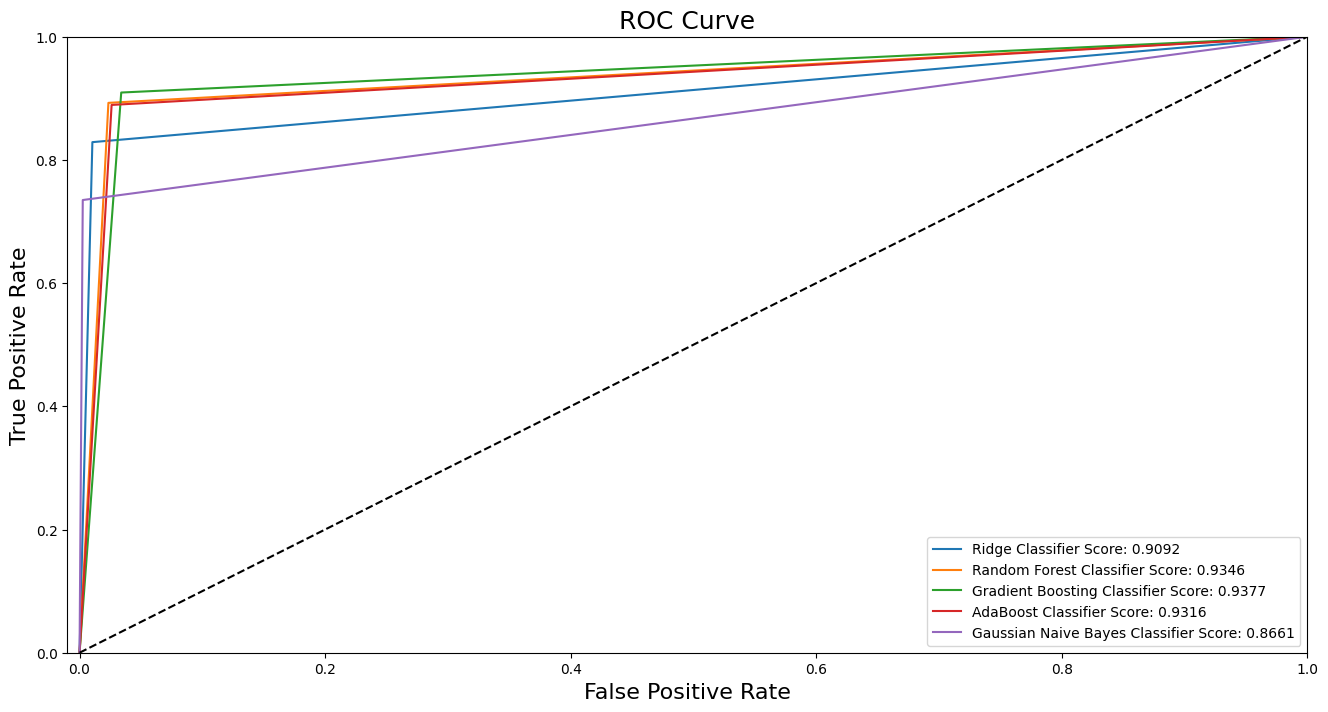

In [84]:
ridge_fpr, ridge_tpr, ridge_thresold = roc_curve(y_train, ridge_pred)
rf_fpr, rf_tpr, rf_thresold = roc_curve(y_train, rf_pred)
gb_fpr, gb_tpr, gb_thresold = roc_curve(y_train, gb_pred)
ada_fpr, ada_tpr, ada_thresold = roc_curve(y_train, ada_pred)
gnb_fpr, gnb_tpr, gnb_thresold = roc_curve(y_train, gnb_pred)


def graph_roc_curve_multiple(ridge_fpr, ridge_tpr, rf_fpr, rf_tpr, gb_fpr, gb_tpr, ada_fpr, ada_tpr, gnb_fpr, gnb_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)

    plt.plot(ridge_fpr, ridge_tpr, label='Ridge Classifier Score: {:.4f}'.format(roc_auc_score(y_train, ridge_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, rf_pred)))
    plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting Classifier Score: {:.4f}'.format(roc_auc_score(y_train, gb_pred)))
    plt.plot(ada_fpr, ada_tpr, label='AdaBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_train, ada_pred)))
    plt.plot(gnb_fpr, gnb_tpr, label='Gaussian Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y_train, gnb_pred)))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()


graph_roc_curve_multiple(ridge_fpr, ridge_tpr, rf_fpr, rf_tpr, gb_fpr, gb_tpr, ada_fpr, ada_tpr, gnb_fpr, gnb_tpr)
plt.show()

### SMOTE метод (Over-Sampling):

<b>SMOTE</b> означает Synthetic Minority Over-sampling Technique.  В отличие от Random Under-Sampling, SMOTE создает новые синтетические точки для того, чтобы создать баланс классов. Это еще одна альтернатива для решения проблемы дисбаланса классов. <br><br>


<b> Принцип работы SMOTE: </b>
<ul>
<li><b>Генерация синтетических точек: </b> SMOTE выбирает расстояние между ближайшими соседями меньшего класса и между ними создает синтетические точки. </li>
<li> <b>Преимущество:  </b> Сохраняется больше информации, поскольку нам не пришлось удалять данные, в отличие от under-sampling.</li>
</ul>

### Правильное использование SMOTE
Если мы создадим синтетические точки перед кросс-валидацией, мы окажем определенное влияние на тестовое выборку. Но тестовая выборка не должна быть тронута! По этой причине мы должны создавать синтетические точки данных во время кросс-валидации, а не до нее.

Попробуем в качестве алгоритм подбора гиперпараметров случайный поиск. Он работает быстрее, чем поиск по сетке.

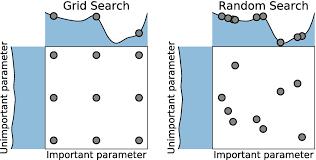

In [85]:
# Берем кусок кода из предыдущего блокнота
from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # Менее чувствителен к выбросам, чем просто стандартизация

X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)


original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
original_Xtest['scaled_amount'] = rob_scaler.fit_transform(original_Xtest['Amount'].values.reshape(-1,1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtest['scaled_time'] = rob_scaler.fit_transform(original_Xtest['Time'].values.reshape(-1,1))

original_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Распределение классов: 

Обучающий набор: [0.99818298 0.00181702]
Тестовый набор: [0.99863067 0.00136933]


In [86]:
# сохраним параметры наших классификаторов, на которых они показали лучших результат с GridSearchCV

tuned_classifiers = {
    "Ridge Classifier": ridge_clf,
    "Random Forest Classifier": rf_clf,
    "Gradient Boosting Classifier": gb_clf,
    "AdaBoost Classifier": ada_clf,
    "Gaussian Naive Bayes": gnb_clf
}

#Making our Classifiers train with the tuned parameters
for key, classifier in tuned_classifiers.items():
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'{key} Cross Validation Score: {round(score.mean() * 100, 2)}%')

Ridge Classifier Cross Validation Score: 91.92%
Random Forest Classifier Cross Validation Score: 93.1%
Gradient Boosting Classifier Cross Validation Score: 94.13%
AdaBoost Classifier Cross Validation Score: 93.69%
Gaussian Naive Bayes Cross Validation Score: 88.25%


In [87]:
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Machine learning Pipeline libraries
from imblearn.pipeline import Pipeline

# here we are using the imbalanced dataset
X = df.drop('Class', axis=1)
y = df['Class']


# StratifiedKFold is used for cross validation
# This cross-validation object is a variation of KFold that returns stratified folds.
# The folds are made by preserving the percentage of samples for each class.
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# creating the object for Over Sampling the minority class
over = SMOTE(sampling_strategy=0.01,k_neighbors=5)

# creating the object for Under Sampling the majority class
under = RandomUnderSampler(sampling_strategy=0.5)

# iterating thru the dictionary of tuned classifiers
for key, classifier in tuned_classifiers.items():

    # list of steps to be provided to the ML Pipeline
    steps=[('o',over),('u',under),('model',classifier)]

    # Creating a ML Pipeline
    FiPipeline=Pipeline(steps=steps)

    # Cross validating the classifiers
    scores=cross_val_score(FiPipeline,X,y,cv=sss)

    # Printing the mean accuracy score
    print(f"Classifiers: {key} Has a training score of, {round(scores.mean() * 100, 2)} % accuracy score")

Classifiers: Ridge Classifier Has a training score of, 99.44 % accuracy score
Classifiers: Random Forest Classifier Has a training score of, 99.74 % accuracy score
Classifiers: Gradient Boosting Classifier Has a training score of, 99.4 % accuracy score
Classifiers: AdaBoost Classifier Has a training score of, 99.06 % accuracy score
Classifiers: Gaussian Naive Bayes Has a training score of, 99.64 % accuracy score


In [88]:
# taking a fold of a data to do GridSearchCV for best parameters for SMOTE
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# creating a ML pipeline
model = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.01)),
        ('Random',RandomUnderSampler(sampling_strategy=0.5)),
        ('classification', ridge_clf)
    ])

# Running GridSearchCV on our ML pipeline by varying the k_neighbors from 1 to 10
# to find the best k_neighbors parameter value
# NOTE :- in paramgrid use above key + 2 _ followed by parameter
SMOTE_KN = GridSearchCV(model,{'sampling__k_neighbors':list(range(1,10))})
SMOTE_KN.fit(original_Xtrain,original_ytrain)

print(SMOTE_KN.best_estimator_)
print(SMOTE_KN.best_score_)
print(SMOTE_KN.best_params_)

# Training logistic regression classifier using SMOTE best parameter value for k_neighbors parameter
log_reg_score = cross_val_score(SMOTE_KN.best_estimator_, original_Xtrain, original_ytrain, cv=5)

# printing the mean accuracy score
print(f'Ridge Classifier Cross Validation Score: {round(ridge_score.mean() * 100, 2)}%')

Pipeline(steps=[('sampling', SMOTE(k_neighbors=1, sampling_strategy=0.01)),
                ('Random', RandomUnderSampler(sampling_strategy=0.5)),
                ('classification', RidgeClassifier(alpha=10.0))])
0.9956856813170726
{'sampling__k_neighbors': 1}
Ridge Classifier Cross Validation Score: 91.92%


In [89]:
labels = ['Non Fraud', 'Fraud']

best_est = SMOTE_KN.best_estimator_
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.22      0.71      0.34        98

    accuracy                           1.00     56961
   macro avg       0.61      0.85      0.67     56961
weighted avg       1.00      1.00      1.00     56961



In [90]:
y_score = best_est.decision_function(original_Xtest)

In [91]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Применим SMOTE после кросс-валидации
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [92]:
# Обучим логистическую регрессию
t0 = time.time()
ridge_sm = grid_ridge.best_estimator_
ridge_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))

Время обучения: 0.3025472164154053 сек


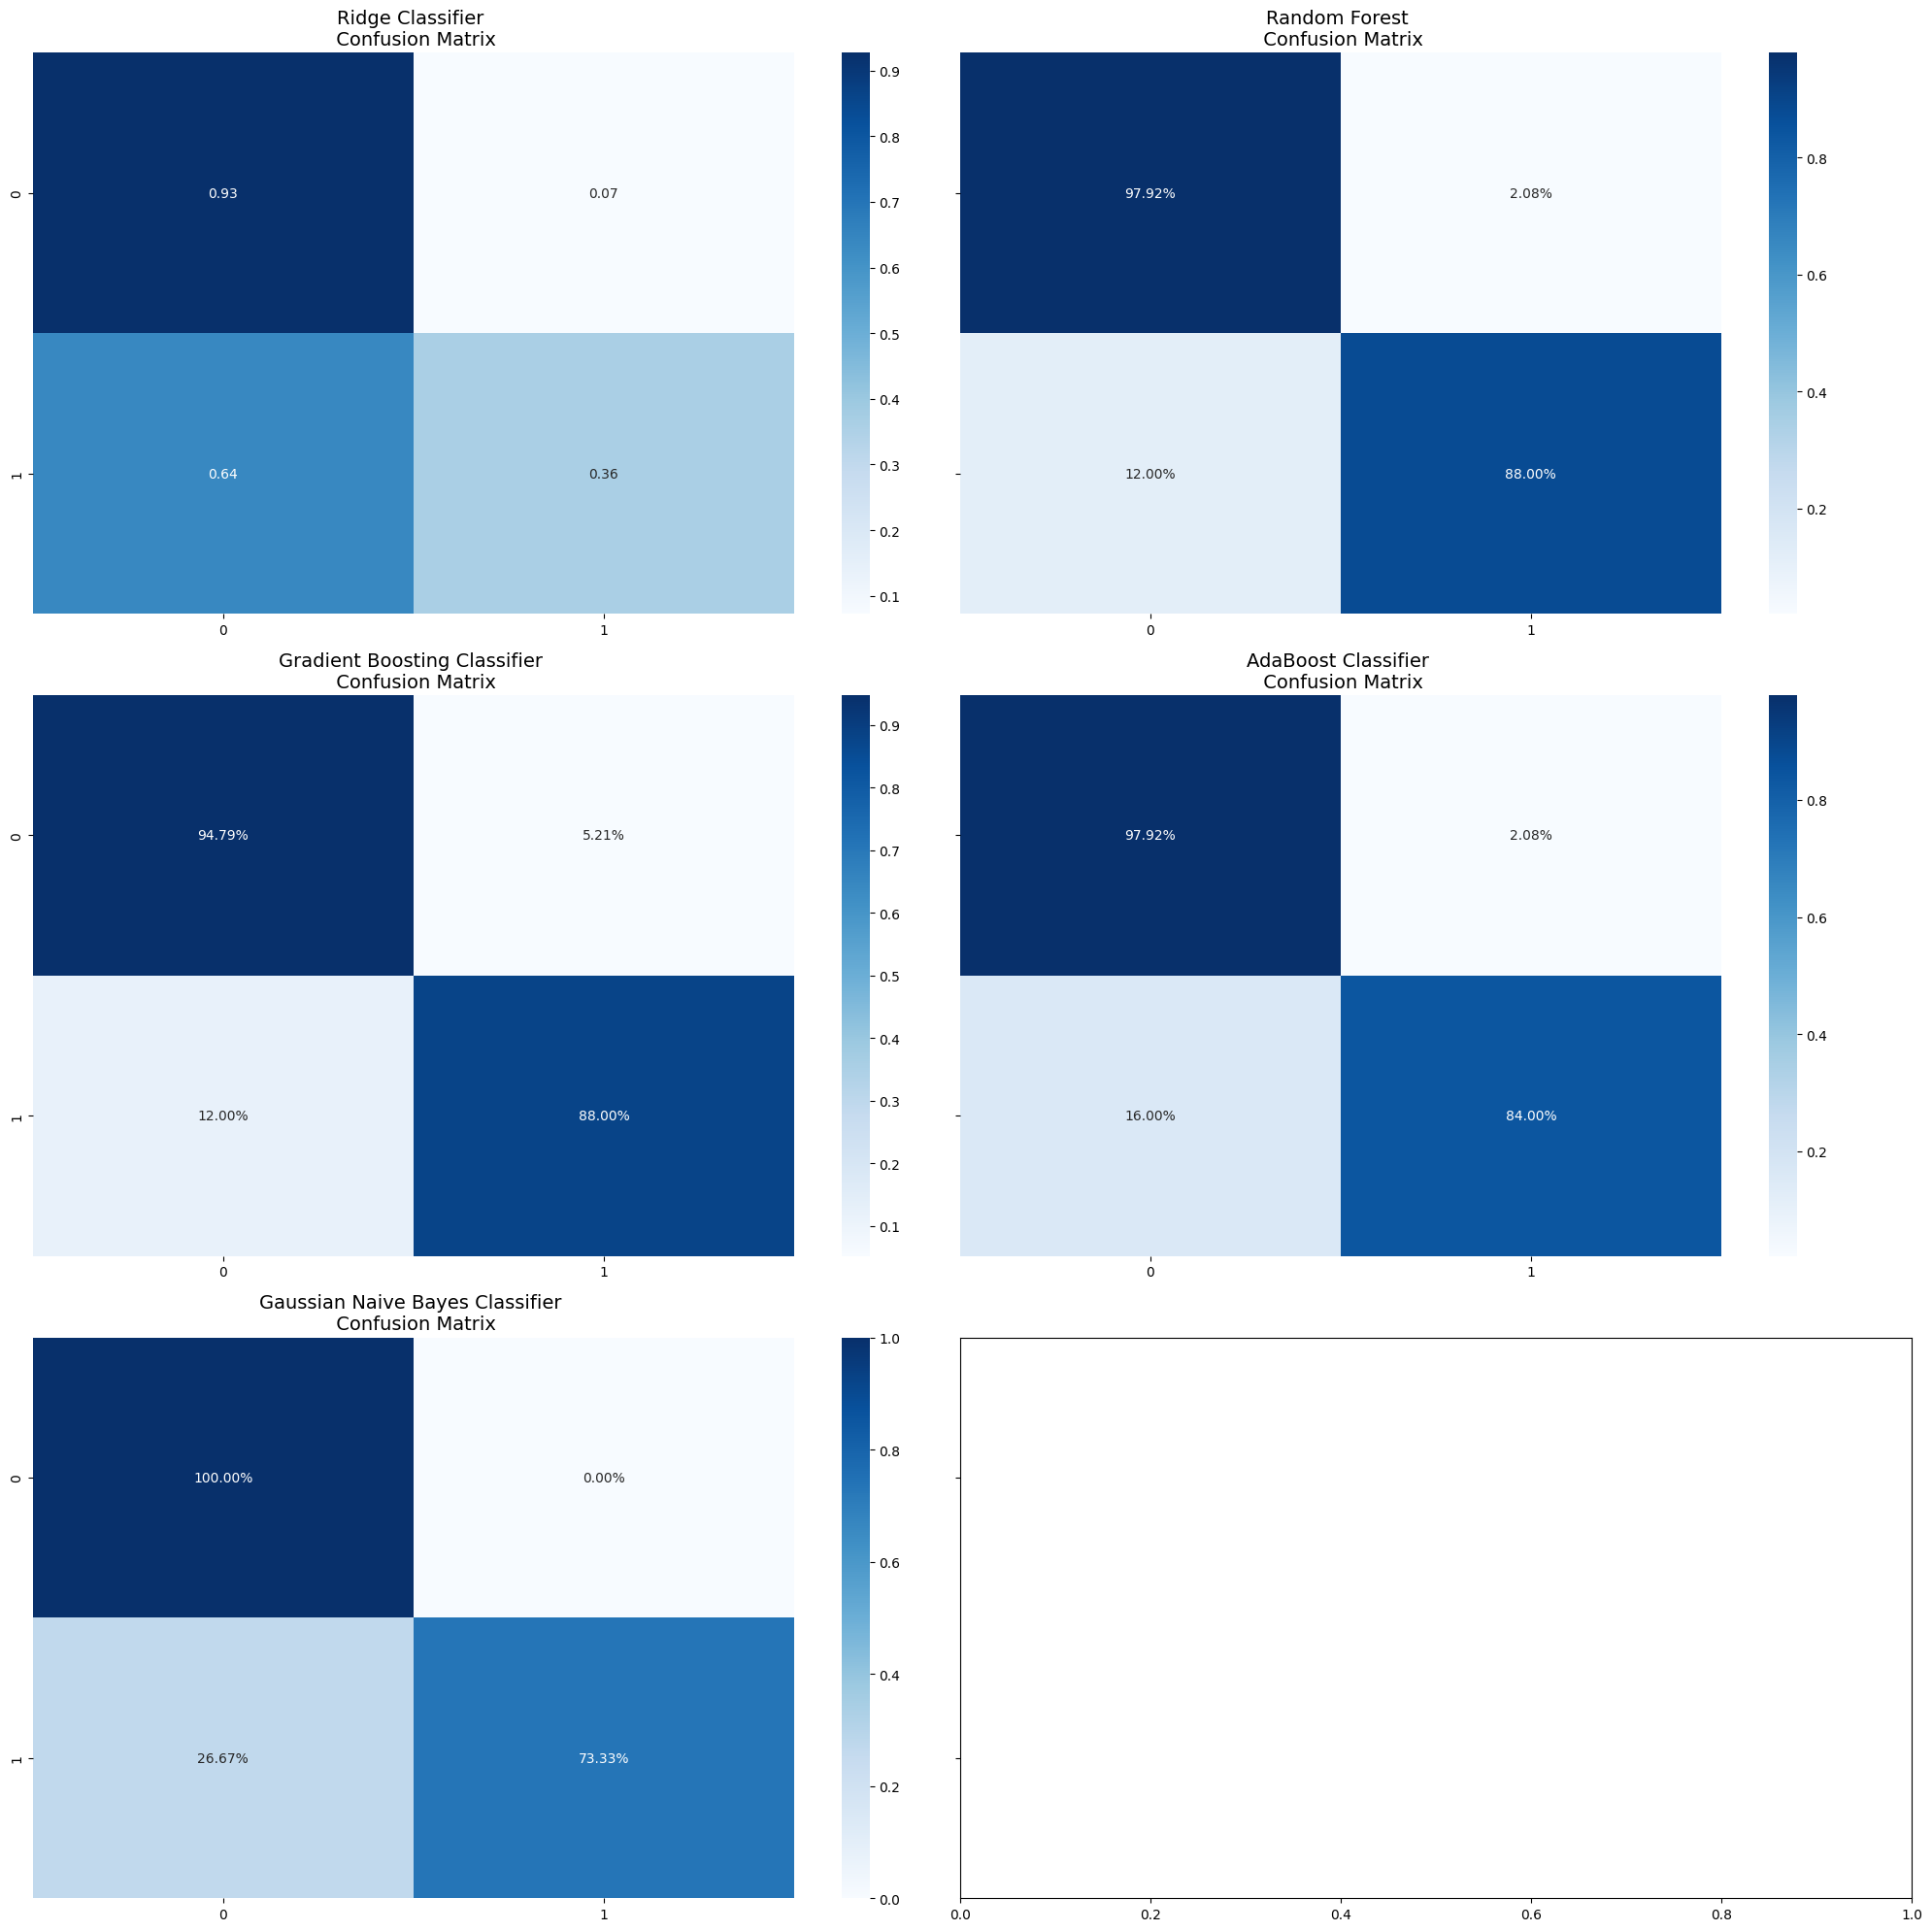

In [93]:
y_pred_ridge = best_est.predict(X_test)

# Другие модели
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)
y_pred_ada = ada_clf.predict(X_test)
y_pred_gnb = gnb_clf.predict(X_test)


ridge_cf = confusion_matrix(y_test, y_pred_ridge, normalize='true')
rf_cf = confusion_matrix(y_test, y_pred_rf, normalize='true')
gb_cf = confusion_matrix(y_test, y_pred_gb, normalize='true')
ada_cf = confusion_matrix(y_test, y_pred_ada, normalize='true')
gnb_cf = confusion_matrix(y_test, y_pred_gnb, normalize='true')


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 20), sharey=True)
# Построим матрицы ошибок
sns.heatmap(ax=ax1, data=ridge_cf, annot=True, fmt='.2f', cmap='Blues')
ax1.set_title("Ridge Classifier \n Confusion Matrix", fontsize=14)

sns.heatmap(ax=ax2, data=rf_cf, annot=True, fmt='.2%', cmap='Blues')
ax2.set_title("Random Forest \n Confusion Matrix", fontsize=14)

sns.heatmap(ax=ax3, data=gb_cf, annot=True, fmt='.2%', cmap='Blues')
ax3.set_title("Gradient Boosting Classifier \n Confusion Matrix", fontsize=14)

sns.heatmap(ax=ax4, data=ada_cf, annot=True, fmt='.2%', cmap='Blues')
ax4.set_title("AdaBoost Classifier \n Confusion Matrix", fontsize=14)

sns.heatmap(ax=ax5, data=gnb_cf, annot=True, fmt='.2%', cmap='Blues')
ax5.set_title("Gaussian Naive Bayes Classifier \n Confusion Matrix", fontsize=14)

plt.tight_layout()  # Для более удобного расположения графиков
plt.show()

Выведем основные метрики моделей.

Давайте вспомним основные метрики качества классификации на примере нашей задачи:

* **Confusion matrix** : так же известна как матрица ошибок, состоит из 4 частей:

    * true positive (TP) : транзакция была мошеннической и модель предсказала ее как мошенническую
    * true negative (TN) : транзакция была нормальной и модель определила ее как нормальную
    * false positive (FP) : транзакция была нормальная, но модель среагировала на нее как на мошенническую
    * false negative (FN) : транзакция была мошенническая, но модель ее пропустила и посчитала нормальной


* **Метрики** :

    * Accuracy : (TP +TN) / (TP + TN + FP +FN)
    * Precision : TP / (TP + FP) (подходит при дисбалансе)
    * Recall : TP / (TP + FN) (подходит при дисбалансе)
    * F1 score : 2 x ((Precision x Recall) / (Precision + Recall)) (подходит при дисбалансе)

* **Roc-кривая** : ROC-кривая строится путем отрисовки графика зависимости частоты истинных положительных результатов (TPR) от частоты ложных положительных результатов (FPR) при различных пороговых значениях.

In [94]:
from sklearn.metrics import classification_report

print('Ridge Classifier:')
y_pred =  best_est.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Random Forest:')
y_pred = rf_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Gradient Boosting Classifier:')
y_pred = gb_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('AdaBoost Classifier:')
y_pred = ada_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Gaussian Naive Bayes Classifier:')
y_pred = gnb_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

Ridge Classifier:
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.22      0.71      0.34        98

    accuracy                           1.00     56961
   macro avg       0.61      0.85      0.67     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest:
              precision    recall  f1-score   support

   Non Fraud       1.00      0.98      0.99     56863
       Fraud       0.04      0.44      0.07        98

    accuracy                           0.98     56961
   macro avg       0.52      0.71      0.53     56961
weighted avg       1.00      0.98      0.99     56961

Gradient Boosting Classifier:
              precision    recall  f1-score   support

   Non Fraud       1.00      0.94      0.97     56863
       Fraud       0.00      0.11      0.01        98

    accuracy                           0.94     56961
   macro avg       0.50      0.53      0.49     56961
weighted av

Поскольку мы выбрали Decision Tree Classifier в качестве основной модели, давайте сравним ее качество в случае подхода under-sampling и в случае over-sampling.

In [95]:
# Ridge регрессия с under-sampling
y_pred = ridge_clf.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)

# Ridge регрессия с over-sampling
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Метод': ['Random Under-Sampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Метод,Score
0,Random Under-Sampling,0.988571
1,Oversampling (SMOTE),0.995190


Итак, в данной задаче более оптимальным подходом оказался over-samplimg методом SMOTE.